## **AIVLE School 미니프로젝트 5기 AI트랙 2차** ##
## **공공데이터를 활용한 <span style="color:skyblue">미세먼지 농도</span> 예측**
---
## [step 1,2] 데이터 분석 및 전처리

## **0.프로젝트 소개**

### (1) 수행 목표
- 미세먼지 농도를 예측하는 머신러닝 모델을 만드세요.

#### 우리가 풀어야 하는 문제는 무엇인가요?
* 서울 지역의 미세먼지 데이터와 날씨 데이터를 활용하여, 미세먼지 예측에 관련 있는 데이터 항목으로 데이터를 구성, 전처리 하여 미세먼지 농도를 예측하는 머신러닝 모델 구현

### (2) 데이터 소개

#### 1) 기본 데이터

* 학습 데이터
    * air_2022.csv : 2022년 미세먼지 데이터
    * weather_2022.csv : 2022년 날씨 데이터
* 테스트 데이터
    * air_2023.csv : 2023년 미세먼지 데이터
    * weather_2023.csv : 2023년 날씨 데이터

#### 2) 데이터셋의 변수 소개(weather_2022,2023)

* 증기압: 증기가 고체 또는 액체와 동적 평형 상태에 있을 때 증기의 압력 (증기가 되려는 힘)
* 이슬점 온도: 불포화 상태의 공기가 냉각될 때, 포화 상태에 도달하여 수증기의 응결이 시작되는 온도
* 일조: 일정한 물체나 땅의 겉면에 태양 광선이 비치는 시간 (1시간 중 비율)
* 일사(량): 태양으로부터 오는 태양 복사 에너지가 지표에 닿는 양 (면적당 에너지 량)
* 전운량: 하늘을 육안으로 관측하여 전부 구름일 때 10, 구름이 덮고 있는 하늘의 비율에 따라 0~10
* 중하층운량: 중층과 하층에 있는 구름의 분포량(중하층 구름이 날씨에 영향 주므로 따로 표기)
* 운형(운형약어): 구름의 종류. 약어 코드로 기재됨
* 최저운고: 가장 낮은 구름의 높이
* 현상번호(국내식): 비, 소낙비, 싸락눈, 눈보라 등의 기상현상을 나타낸 코드번호
* 지면온도: 지면 0cm 온도
* 지중온도: 땅 속 온도변수1

## **1.환경설정**

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.)
        * 2) 구글 코랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
            
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정
* 로컬환경 또는 구글 코랩 중 하나를 사용하시면 됩니다.

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [290]:
path = 'C:/Users/User/project/'

#### 2) 구글 코랩 수행

* 구글 드라이브 연결

In [291]:
# from google.colab import drive
# drive.mount('/content/drive')

In [292]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 라이브러리 설치 및 로딩

In [4]:
# 필요한 라이브러리 설치 및 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm
import joblib

# 더 필요한 라이브러리를 아래에 추가합니다.



In [5]:
# 시각화 한글폰트 설정을 위해 아래 코드를 실행하세요.
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

### (3) 데이터 불러오기
* Pandas 라이브러리를 활용해서 'air_2022.csv'파일을 'air_22' 변수에,'air_2023.csv'파일을 'air_23' 변수에 저장하고 그 데이터를 확인하세요.
<br> ( 구분자(sep) : ',' / encoder = 'utf-8' / index_col = 0 )

* Pandas 라이브러리를 활용해서 'weather_2022.csv'파일을 'weather_22' 변수에,'weather_2023.csv'파일을 'weather_23' 변수에 저장하고 그 데이터를 확인하세요.
<br> ( 구분자(sep) : ',' / encoder = 'cp949' )

#### 1) 데이터로딩

In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
air_22_tmp = pd.read_csv('air_2022.csv', sep=",", encoding = 'UTF-8', index_col=0)

In [7]:
max(air_22_tmp['PM25'])

121.0

In [295]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
air_22 = pd.read_csv('air_2022.csv', sep=",", encoding = 'UTF-8', index_col=0)

In [296]:
air_22.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 종로구,도시대기,111123,종로구,2022010101,0.003,0.4,0.026,0.016,23.0,12.0,서울 종로구 종로35가길 19
1,서울 종로구,도시대기,111123,종로구,2022010102,0.003,0.4,0.022,0.020,20.0,9.0,서울 종로구 종로35가길 19
2,서울 종로구,도시대기,111123,종로구,2022010103,0.003,0.5,0.014,0.028,20.0,9.0,서울 종로구 종로35가길 19
3,서울 종로구,도시대기,111123,종로구,2022010104,0.003,0.5,0.016,0.027,19.0,10.0,서울 종로구 종로35가길 19
4,서울 종로구,도시대기,111123,종로구,2022010105,0.003,0.5,0.005,0.040,24.0,11.0,서울 종로구 종로35가길 19


In [297]:
air_23 = pd.read_csv('air_2023.csv',sep=",", encoding = 'UTF-8', index_col=0)

In [298]:
weather_22 = pd.read_csv('weather_2022.csv', encoding="cp949", sep=',')

In [299]:
weather_22.head()

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,서울,2022-01-01 00:00,-8.5,NaN,NaN,NaN,1.9,NaN,320,...,NaN,2000,NaN,NaN,-7.0,NaN,-1.0,-1.0,-0.2,1.0
1,108,서울,2022-01-01 01:00,-9.2,NaN,NaN,NaN,1.8,NaN,270,...,NaN,2000,NaN,NaN,-7.2,NaN,-1.1,-1.1,-0.2,1.0
2,108,서울,2022-01-01 02:00,-9.5,NaN,NaN,NaN,1.2,NaN,270,...,NaN,2000,NaN,NaN,-7.5,NaN,-1.3,-1.2,-0.2,1.0
3,108,서울,2022-01-01 03:00,-9.3,NaN,NaN,NaN,1.4,NaN,290,...,NaN,2000,NaN,NaN,-7.6,NaN,-1.4,-1.2,-0.2,1.0
4,108,서울,2022-01-01 04:00,-9.6,NaN,NaN,NaN,1.7,NaN,340,...,NaN,2000,NaN,NaN,-7.6,NaN,-1.4,-1.3,-0.3,1.0


In [300]:
weather_23 = pd.read_csv('weather_2023.csv',encoding="cp949", sep=",")

In [301]:
weather_23.head()

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,서울,2023-01-01 0:00,0.9,NaN,NaN,9.0,1.4,NaN,200,...,NaN,1503,NaN,NaN,-1.6,NaN,-0.3,-0.6,-0.5,0.6
1,108,서울,2023-01-01 1:00,1.5,NaN,NaN,NaN,1.9,NaN,250,...,12.0,1104,NaN,NaN,-1.4,NaN,-0.3,-0.5,-0.5,0.6
2,108,서울,2023-01-01 2:00,1.5,NaN,NaN,NaN,1.9,NaN,250,...,11.0,925,NaN,40.0,-1.6,NaN,-0.3,-0.5,-0.5,0.6
3,108,서울,2023-01-01 3:00,1.6,NaN,NaN,NaN,1.6,NaN,250,...,16.0,794,NaN,40.0,-1.8,NaN,-0.3,-0.5,-0.5,0.6
4,108,서울,2023-01-01 4:00,1.5,NaN,NaN,NaN,1.4,NaN,290,...,10.0,709,NaN,40.0,-1.3,NaN,-0.2,-0.5,-0.5,0.6


#### 2) 기본 정보 조회
- 데이터를 head, tail. describe, info 등을 활용하여 확인하세요.

In [302]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
air_22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      8760 non-null   object 
 1   망       8760 non-null   object 
 2   측정소코드   8760 non-null   int64  
 3   측정소명    8760 non-null   object 
 4   측정일시    8760 non-null   int64  
 5   SO2     8673 non-null   float64
 6   CO      8673 non-null   float64
 7   O3      8673 non-null   float64
 8   NO2     8673 non-null   float64
 9   PM10    8604 non-null   float64
 10  PM25    8655 non-null   float64
 11  주소      8760 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 889.7+ KB


In [303]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
air_23.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5832 entries, 0 to 5831
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      5832 non-null   object 
 1   망       5832 non-null   object 
 2   측정소코드   5832 non-null   int64  
 3   측정소명    5832 non-null   object 
 4   측정일시    5832 non-null   int64  
 5   SO2     5588 non-null   float64
 6   CO      5798 non-null   float64
 7   O3      5771 non-null   float64
 8   NO2     5798 non-null   float64
 9   PM10    5792 non-null   float64
 10  PM25    5793 non-null   float64
 11  주소      5832 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 592.3+ KB


In [304]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
air_22.describe()

,측정소코드,측정일시,SO2,CO,O3,NO2,PM10,PM25
count,8760.0,8.760000e+03,8673.000000,8673.000000,8673.000000,8673.000000,8604.000000,8655.000000
mean,111123.0,2.022067e+09,0.003133,0.473458,0.030759,0.021319,31.756044,19.284575
std,0.0,3.450216e+04,0.000700,0.183086,0.019796,0.013473,22.466954,14.172678
min,111123.0,2.022010e+09,0.001000,0.200000,0.001000,0.003000,3.000000,1.000000
25%,111123.0,2.022040e+09,0.003000,0.400000,0.017000,0.011000,19.000000,10.000000
50%,111123.0,2.022070e+09,0.003000,0.400000,0.029000,0.017000,28.000000,16.000000
75%,111123.0,2.022100e+09,0.003000,0.500000,0.042000,0.028000,40.000000,25.000000
max,111123.0,2.022123e+09,0.008000,1.800000,0.144000,0.074000,385.000000,121.000000


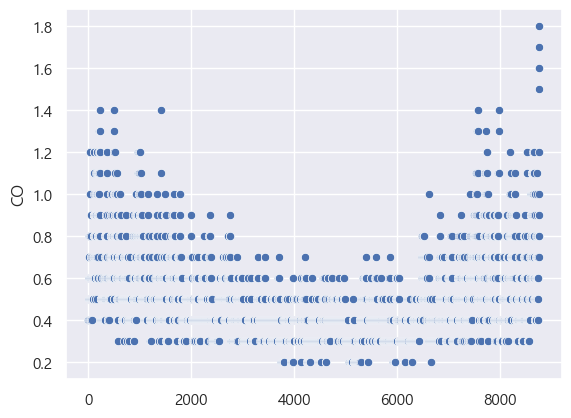

In [305]:
sns.scatterplot(air_22['CO'])
plt.show()

## **2.EDA 1단계 - 데이터 기본 탐색 및 분석**

* 단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

    * <span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

        1. 변수가 내포하고 있는 의미
        2. 변수가 수치형인지, 범주형인지
        3. 결측치 존재 여부 및 조치 방안
        4. 기초 통계량 확인
        5. 데이터 분포 확인
        6. 위 정보로부터 파악한 내용 정리
        7. 추가 분석사항 도출

### (1) 변수별 단변량 분석
- 4 ~ 5개 변수를 선택해서 위 1~6번을 확인해보세요 (7번은 선택)

#### **[예시] 1) Feature1 : 측정일시**

**1. 변수가 내포하고 있는 의미**

In [306]:
# 고민하고 확인해봅시다.
weather_22[['일시']].head()

,일시
0,2022-01-01 00:00
1,2022-01-01 01:00
2,2022-01-01 02:00
3,2022-01-01 03:00
4,2022-01-01 04:00


**2. 변수가 수치형인지 범주형인지**
  - 날짜는 범주형? 수치형?

In [307]:
# 고민하고 확인해봅시다.
# 수치형

**3. 변수의 결측치 존재 여부 및 조치 방안**

In [308]:
# 고민하고 확인해봅시다.
weather_22['일시'].isna().sum()

0

**4.변수의 기초 통계량 확인**

In [309]:
# 고민하고 확인해봅시다.
weather_22['일시'].describe()

count                 8760
unique                8760
top       2022-01-01 00:00
freq                     1
Name: 일시, dtype: object

**5. 변수의 분포 확인**

In [310]:
# 고민하고 확인해봅시다.
air_22['측정일시'].head(30)

0     2022010101
1     2022010102
2     2022010103
3     2022010104
4     2022010105
5     2022010106
6     2022010107
7     2022010108
8     2022010109
9     2022010110
10    2022010111
11    2022010112
12    2022010113
13    2022010114
14    2022010115
15    2022010116
16    2022010117
17    2022010118
18    2022010119
19    2022010120
20    2022010121
21    2022010122
22    2022010123
23    2022010124
24    2022010201
25    2022010202
26    2022010203
27    2022010204
28    2022010205
29    2022010206
Name: 측정일시, dtype: int64

**6. 위 정보로 부터 파악한 내용 정리**

In [311]:
# df_22.corr(numeric_only=True)

In [312]:
# 고민하고 확인해봅시다.

-----------**아래에 추가로 3-4개의 변수를 같은 방법으로 고민해보기!** -----------------------

## **3.EDA 2단계 - 데이터 전처리**
- 진행한 개별 변수 분석에 맞추어 데이터를 전처리 하겠습니다.

### (1) air_22, air_23, weather_22, weather_23 데이터 전처리
* air_22, air_23  각각 '측정일시'를 활용하여 'time'변수 생성
    * 참고: 미세먼지 데이터는 1시-24시, 날씨 데이터는 0시-23시로 구성되어 있습니다. 미세먼지와 날씨 데이터를 time 기준으로 합치려면 기준이 동일해야 합니다. 미세먼지 데이터에서 time 변수 생성 시 이를 미리 고려(예: air_22['측정일시'] -1)하세요.
* time 변수를 pd.to_datetime으로 데이터 타입 변경
    * 참고: format = '%Y%m%d%H'

#### 1) air_22, air_23 의 '측정일시'를 활용하여 'time' 변수 생성

In [313]:
air_22['측정일시'] = air_22['측정일시'] - 1

In [314]:
air_23['측정일시'] = air_23['측정일시'] - 1

In [315]:
air_22['측정일시'].info()

<class 'pandas.core.series.Series'>
Index: 8760 entries, 0 to 8759
Series name: 측정일시
Non-Null Count  Dtype
--------------  -----
8760 non-null   int64
dtypes: int64(1)
memory usage: 136.9 KB


In [316]:
air_22['time'] = air_22['측정일시'].astype(str)
air_23['time'] = air_23['측정일시'].astype(str)

In [317]:
# # 아래에 필요한 코드를 작성하고 결과를 확인합니다.
weather_22['time'] = pd.to_datetime(weather_22['일시'])
weather_22['time'] = weather_22['time'].dt.strftime('%Y%m%d%H')

In [318]:
weather_22.head()

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),time
0,108,서울,2022-01-01 00:00,-8.5,NaN,NaN,NaN,1.9,NaN,320,...,2000,NaN,NaN,-7.0,NaN,-1.0,-1.0,-0.2,1.0,2022010100
1,108,서울,2022-01-01 01:00,-9.2,NaN,NaN,NaN,1.8,NaN,270,...,2000,NaN,NaN,-7.2,NaN,-1.1,-1.1,-0.2,1.0,2022010101
2,108,서울,2022-01-01 02:00,-9.5,NaN,NaN,NaN,1.2,NaN,270,...,2000,NaN,NaN,-7.5,NaN,-1.3,-1.2,-0.2,1.0,2022010102
3,108,서울,2022-01-01 03:00,-9.3,NaN,NaN,NaN,1.4,NaN,290,...,2000,NaN,NaN,-7.6,NaN,-1.4,-1.2,-0.2,1.0,2022010103
4,108,서울,2022-01-01 04:00,-9.6,NaN,NaN,NaN,1.7,NaN,340,...,2000,NaN,NaN,-7.6,NaN,-1.4,-1.3,-0.3,1.0,2022010104


In [319]:
# 결과확인
air_22.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,time
0,서울 종로구,도시대기,111123,종로구,2022010100,0.003,0.4,0.026,0.016,23.0,12.0,서울 종로구 종로35가길 19,2022010100
1,서울 종로구,도시대기,111123,종로구,2022010101,0.003,0.4,0.022,0.020,20.0,9.0,서울 종로구 종로35가길 19,2022010101
2,서울 종로구,도시대기,111123,종로구,2022010102,0.003,0.5,0.014,0.028,20.0,9.0,서울 종로구 종로35가길 19,2022010102
3,서울 종로구,도시대기,111123,종로구,2022010103,0.003,0.5,0.016,0.027,19.0,10.0,서울 종로구 종로35가길 19,2022010103
4,서울 종로구,도시대기,111123,종로구,2022010104,0.003,0.5,0.005,0.040,24.0,11.0,서울 종로구 종로35가길 19,2022010104


#### 2) weather_22, weather_23 의 '일시'를 활용하여 'time' 변수 생성
* weather_22, weather_23 의 '일시'를 활용하여 'time'변수 생성
* time 변수를 pd.to_datetime으로 데이터 타입 변경

In [320]:
# # 아래에 필요한 코드를 작성하고 결과를 확인합니다.
weather_23['time'] = pd.to_datetime(weather_23['일시'])
weather_23['time'] = weather_23['time'].dt.strftime('%Y%m%d%H')

In [321]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
weather_23.head()

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),time
0,108,서울,2023-01-01 0:00,0.9,NaN,NaN,9.0,1.4,NaN,200,...,1503,NaN,NaN,-1.6,NaN,-0.3,-0.6,-0.5,0.6,2023010100
1,108,서울,2023-01-01 1:00,1.5,NaN,NaN,NaN,1.9,NaN,250,...,1104,NaN,NaN,-1.4,NaN,-0.3,-0.5,-0.5,0.6,2023010101
2,108,서울,2023-01-01 2:00,1.5,NaN,NaN,NaN,1.9,NaN,250,...,925,NaN,40.0,-1.6,NaN,-0.3,-0.5,-0.5,0.6,2023010102
3,108,서울,2023-01-01 3:00,1.6,NaN,NaN,NaN,1.6,NaN,250,...,794,NaN,40.0,-1.8,NaN,-0.3,-0.5,-0.5,0.6,2023010103
4,108,서울,2023-01-01 4:00,1.5,NaN,NaN,NaN,1.4,NaN,290,...,709,NaN,40.0,-1.3,NaN,-0.2,-0.5,-0.5,0.6,2023010104


In [322]:
# 결과확인
weather_22['time'] = weather_22['time'].astype(str)

In [323]:
weather_23['time'] = weather_23['time'].astype(str)

#### 3) 'time' 기준으로 데이터 합치기
* 미세먼지 데이터와 날씨 데이터를 'time' 기준으로 합쳐보세요.
    * df_22에는 'time' 기준으로 22년도 미세먼지, 날씨 데이터를 합쳐보세요.
    * df_23에는 'time' 기준으로 23년도 미세먼지, 날씨 데이터를 합쳐보세요.

In [324]:
air_22.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,time
0,서울 종로구,도시대기,111123,종로구,2022010100,0.003,0.4,0.026,0.016,23.0,12.0,서울 종로구 종로35가길 19,2022010100
1,서울 종로구,도시대기,111123,종로구,2022010101,0.003,0.4,0.022,0.020,20.0,9.0,서울 종로구 종로35가길 19,2022010101
2,서울 종로구,도시대기,111123,종로구,2022010102,0.003,0.5,0.014,0.028,20.0,9.0,서울 종로구 종로35가길 19,2022010102
3,서울 종로구,도시대기,111123,종로구,2022010103,0.003,0.5,0.016,0.027,19.0,10.0,서울 종로구 종로35가길 19,2022010103
4,서울 종로구,도시대기,111123,종로구,2022010104,0.003,0.5,0.005,0.040,24.0,11.0,서울 종로구 종로35가길 19,2022010104


In [325]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
df_22 = pd.merge(air_22, weather_22, on='time')

In [326]:
df_23 = pd.merge(air_23, weather_23, on='time')

In [327]:
# 결과확인
df_23.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,서울 종로구,도시대기,111123,종로구,2023010100,0.005,1.4,0.002,0.064,68.0,...,NaN,1503,NaN,NaN,-1.6,NaN,-0.3,-0.6,-0.5,0.6
1,서울 종로구,도시대기,111123,종로구,2023010101,0.004,1.4,0.002,0.061,64.0,...,12.0,1104,NaN,NaN,-1.4,NaN,-0.3,-0.5,-0.5,0.6
2,서울 종로구,도시대기,111123,종로구,2023010102,0.004,1.0,0.002,0.051,67.0,...,11.0,925,NaN,40.0,-1.6,NaN,-0.3,-0.5,-0.5,0.6
3,서울 종로구,도시대기,111123,종로구,2023010103,0.004,0.7,0.012,0.030,76.0,...,16.0,794,NaN,40.0,-1.8,NaN,-0.3,-0.5,-0.5,0.6
4,서울 종로구,도시대기,111123,종로구,2023010104,0.004,0.7,0.021,0.017,81.0,...,10.0,709,NaN,40.0,-1.3,NaN,-0.2,-0.5,-0.5,0.6


#### 4) 사용하지 않을 변수 제거

* 머신러닝에 사용하지 않을 변수들을 제거해줍니다.
    * df_22, df_23에 여러분들이 사용할 변수들만 넣어보세요.
* time 변수를 index로 세팅하고 (set_index) 데이터가 정렬되어 있지 않으므로 index 기준으로 정렬하세요. (sort_index)

In [328]:
# df_22, df_23에 사용할 변수들만 할당
df_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지역             8760 non-null   object 
 1   망              8760 non-null   object 
 2   측정소코드          8760 non-null   int64  
 3   측정소명           8760 non-null   object 
 4   측정일시           8760 non-null   int64  
 5   SO2            8673 non-null   float64
 6   CO             8673 non-null   float64
 7   O3             8673 non-null   float64
 8   NO2            8673 non-null   float64
 9   PM10           8604 non-null   float64
 10  PM25           8655 non-null   float64
 11  주소             8760 non-null   object 
 12  time           8760 non-null   object 
 13  지점             8760 non-null   int64  
 14  지점명            8760 non-null   object 
 15  일시             8760 non-null   object 
 16  기온(°C)         8760 non-null   float64
 17  기온 QC플래그       0 non-null      float64
 18  강수량(mm) 

In [329]:
# drop_col = ['지역', '망', '측정소명', '주소','지점명','일시','운형(운형약어)',\
#             '기온 QC플래그', '기온 QC플래그', '풍향 QC플래그', '풍향(16방위)', '증기압(hPa)',\
#             '습도 QC플래그', '현지기압 QC플래그','현지기압(hPa)','해면기압 QC플래그', '해면기압(hPa)','일조(hr)' , \
#             '일사(MJ/m2)','적설(cm)','전운량(10분위)',
#             '지면상태(지면상태코드)', '풍속 QC플래그', '지면온도 QC플래그', '현상번호(국내식)', '3시간신적설(cm)', \
#             '강수량 QC플래그', '일사 QC플래그', '일조 QC플래그', '일사 QC플래그']
# df_22.drop(columns=drop_col, axis=1, inplace=True)

In [365]:
columns = ['강수량(mm)', 'NO2', '기온(°C)', '해면기압(hPa)', '증기압(hPa)']
df_22 = df_22.loc[:, columns]

In [366]:
df_22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8730 entries, 30 to 8759
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   강수량(mm)    8730 non-null   float64
 1   NO2        8730 non-null   float64
 2   기온(°C)     8730 non-null   float64
 3   해면기압(hPa)  8730 non-null   float64
 4   증기압(hPa)   8730 non-null   float64
dtypes: float64(5)
memory usage: 409.2 KB


In [335]:
# df_22['time'] = pd.to_datetime(df_22['time'], format='%Y%m%d%H')

In [336]:
df_23 = df_23.loc[:, columns]

In [337]:
# df_23['time'] = pd.to_datetime(df_23['time'], format='%Y%m%d%H')
# # time 변수를 index로 세팅
# df_23.set_index('time', inplace=True

#### 5) 변수들의 결측치 처리

In [338]:
# df_22, df_23의 결측치 확인
df_22.isna().sum()


강수량(mm)      7821
NO2            87
기온(°C)          0
해면기압(hPa)       0
증기압(hPa)        0
dtype: int64

In [339]:
df_23.isna().sum()

강수량(mm)      5023
NO2            34
기온(°C)          0
해면기압(hPa)       0
증기압(hPa)        0
dtype: int64

In [340]:
# df_22, df_23의 변수 중 결측치를 처리(결측치 처리 방법은 다양!)
# 선택해서 결측치를 처리해보세요.
df_22.fillna(method='ffill', inplace=True)

In [341]:
df_22.isna().sum()

강수량(mm)      30
NO2           0
기온(°C)        0
해면기압(hPa)     0
증기압(hPa)      0
dtype: int64

In [342]:
df_22.dropna(axis=0, inplace=True)

In [343]:
df_22.isna().sum()

강수량(mm)      0
NO2          0
기온(°C)       0
해면기압(hPa)    0
증기압(hPa)     0
dtype: int64

In [344]:
df_23.fillna(method='ffill', inplace=True)
df_23.dropna(axis=0, inplace=True)

In [345]:
# df_22, df_23의 결측치 처리 후 재확인 해보기
df_23.isna().sum()

강수량(mm)      0
NO2          0
기온(°C)       0
해면기압(hPa)    0
증기압(hPa)     0
dtype: int64

In [346]:
df_23.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5694 entries, 138 to 5831
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   강수량(mm)    5694 non-null   float64
 1   NO2        5694 non-null   float64
 2   기온(°C)     5694 non-null   float64
 3   해면기압(hPa)  5694 non-null   float64
 4   증기압(hPa)   5694 non-null   float64
dtypes: float64(5)
memory usage: 266.9 KB


#### 6) 전일 같은 시간 미세먼지 농도 변수 추가

* 먼저 df_22, df_23에 month, day, hour 변수를 추가하세요.
    * 예) dt.month, dt.day, dt.hour 사용 또는 datetimeindex에서는 df.index.month 등 사용 가능
* 모델링에 유용한 변수로 전일 같은 시간(24시간 전) 미세먼지 농도 변수를 추가하세요.
    * 시계열 데이터 처리를 위한 shift 연산을 참고하세요.

In [347]:
df_22.head()

,강수량(mm),NO2,기온(°C),해면기압(hPa),증기압(hPa)
30,0.0,0.041,-1.9,1025.1,3.5
31,0.0,0.042,-2.2,1025.3,4.2
32,0.0,0.042,-2.2,1025.6,4.3
33,0.3,0.039,-1.9,1026.4,4.4
34,0.3,0.031,-0.8,1027.1,4.7


In [349]:
# df_22['PM10_24'] = df_22['PM10'].shift(1, freq='D')

In [351]:
# df_22['PM25_24'] = df_22['PM25'].shift(1, freq='D')

In [352]:
# df_23['PM10_24'] = df_23['PM10'].shift(1, freq='D')

In [354]:
# df_23['PM25_24'] = df_23['PM25'].shift(1, freq='D')

In [355]:
# df_22, df_23에 전일 같은 시간 미세먼지 농도 변수 추가
# 전일 같은 시간은 24시간 전 입니다. (shift 함수 활용)

In [356]:
#확인해보기
df_22.head()

,강수량(mm),NO2,기온(°C),해면기압(hPa),증기압(hPa)
30,0.0,0.041,-1.9,1025.1,3.5
31,0.0,0.042,-2.2,1025.3,4.2
32,0.0,0.042,-2.2,1025.6,4.3
33,0.3,0.039,-1.9,1026.4,4.4
34,0.3,0.031,-0.8,1027.1,4.7


#### 7) t+1 시점의 미세먼지 농도 데이터 생성
* t+1 시점은 1시간 후 입니다.
* t+1 시점의 미세먼지 농도 변수(PM10_1)를 생성하세요.
* t+1 시점의 미세먼지 농도는 머신러닝 모델을 통해 예측하려는 y값(target) 입니다.

In [358]:
# # df_22, df_23에 t+1 시점 변수(PM10_1) 추가
# # shift 함수 활용 해보기!
# df_22['PM10_1'] = df_22['PM10'].shift(1, freq='H')
# df_22.head()

In [359]:
# df_23['PM10_1'] = df_23['PM10'].shift(1, freq='H')
# df_23.head()

In [360]:
#확인해보기!
df_22.isna().sum()

강수량(mm)      0
NO2          0
기온(°C)       0
해면기압(hPa)    0
증기압(hPa)     0
dtype: int64

In [361]:
# 결측치가 있다면 처리하고 확인해보기!

In [362]:
df_22['PM10_24'].fillna(df_22['PM10_24'].mean(), inplace=True)
df_22['PM25_24'].fillna(df_22['PM25_24'].mean(), inplace=True)
df_22['PM10_1'].fillna(df_22['PM10_1'].mean(), inplace=True)

KeyError: 'PM10_24'

In [363]:
# 결측치가 있다면 처리하고 확인해보기!
df_23['PM10_24'].fillna(df_22['PM10_24'].mean(), inplace=True)
df_23['PM25_24'].fillna(df_22['PM25_24'].mean(), inplace=True)
df_23['PM10_1'].fillna(df_22['PM10_1'].mean(), inplace=True)

KeyError: 'PM10_24'

In [364]:
df_22.isna().sum()

강수량(mm)      0
NO2          0
기온(°C)       0
해면기압(hPa)    0
증기압(hPa)     0
dtype: int64

In [240]:
df_23.isna().sum()

측정소코드            0
측정일시             0
SO2              0
CO               0
O3               0
NO2              0
PM10             0
PM25             0
지점               0
기온(°C)           0
강수량(mm)          0
풍속(m/s)          0
습도(%)            0
이슬점온도(°C)        0
중하층운량(10분위)      0
최저운고(100m )      0
시정(10m)          0
지면온도(°C)         0
5cm 지중온도(°C)     0
10cm 지중온도(°C)    0
20cm 지중온도(°C)    0
30cm 지중온도(°C)    0
PM10_24          0
PM25_24          0
PM10_1           0
dtype: int64

### (2) train, test 데이터 분리 및 저장

* 22년도 데이터(df_22)를 train 데이터로 저장하세요. y 값을 제외하고 train_x로 저장한 후 y 값은 train_y로 저장하세요.
* 23년도 데이터(df_23)를 test 데이터로 저장하세요. y 값을 제외하고 test_x로 저장한 후 y 값은 test_y로 저장하세요.
* 각각의 데이터프레임을 csv 파일로 저장하세요. (train_x.csv / train_y.csv / test_x.csv / test_y.csv) (단, 인덱스 제외)
* y값은 'PM10_1' 즉, t+1 시점의 미세먼지 농도입니다.

In [236]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

target = 'PM10_1'
train_x = df_22.reset_index(drop=True).drop(target, axis=1)

In [237]:
train_y = df_22[target]
test_x = df_23.reset_index(drop=True).drop(target, axis=1)
test_y = df_23[target]

In [238]:
# 각각의 데이터프레임을 csv 파일로 저장 (train_x.csv / train_y.csv / test_x.csv / test_y.csv)
train_x.to_csv('./train_x.csv')
train_y.to_csv('./train_y.csv')
test_x.to_csv('./test_x.csv')
test_y.to_csv('./test_y.csv')

In [239]:
train_x.head()

,측정소코드,측정일시,SO2,CO,O3,NO2,PM10,PM25,지점,기온(°C),...,중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),PM10_24,PM25_24
0,111123,2022010206,0.003,0.5,0.004,0.041,33.0,26.0,108,-1.9,...,9,7.0,647,-1.8,-0.3,-0.7,-0.3,0.8,31.690903,19.209511
1,111123,2022010207,0.003,0.6,0.002,0.042,33.0,22.0,108,-2.2,...,9,10.0,692,-1.6,-0.3,-0.6,-0.3,0.8,31.690903,19.209511
2,111123,2022010208,0.003,0.6,0.003,0.042,35.0,22.0,108,-2.2,...,8,12.0,1839,-1.9,-0.2,-0.6,-0.3,0.8,31.690903,19.209511
3,111123,2022010209,0.003,0.6,0.006,0.039,34.0,24.0,108,-1.9,...,8,9.0,1854,-1.5,-0.2,-0.6,-0.3,0.8,31.690903,19.209511
4,111123,2022010210,0.003,0.6,0.012,0.031,42.0,30.0,108,-0.8,...,7,9.0,1924,-0.8,-0.2,-0.6,-0.3,0.8,31.690903,19.209511


# 고생하셨습니다👍👍 

# 이변량 분석

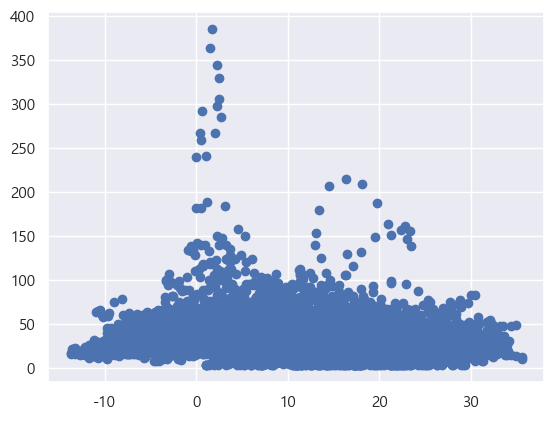

In [246]:
plt.scatter(df_22['기온(°C)'], df_22['PM10_1'])
plt.show()

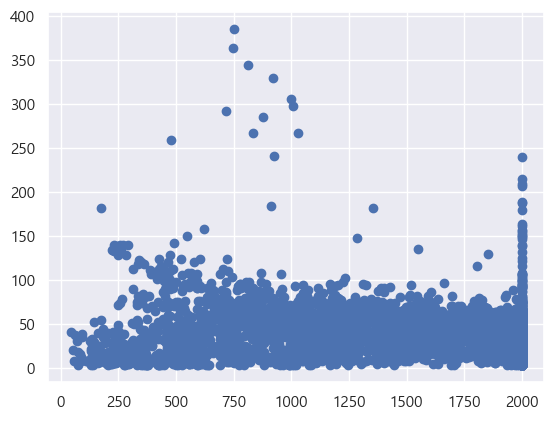

In [247]:
plt.scatter(df_22['시정(10m)'], df_22['PM10_1'])
plt.show()

## 상관관계 분석

In [248]:
import scipy.stats as spst

In [252]:
df_col = df_22.columns
df_col = df_col[1:]

In [272]:
p_value = {}
for col in df_col:
    p_value[col] = spst.pearsonr(df_22[col], df_22['PM10_1'])[1]

In [278]:
sorted_p_value = dict(sorted(p_value.items(), key=lambda item: item[1]))

# 결과 출력
for i in sorted_p_value.items():
    print(i)

('CO', 0.0)
('PM10', 0.0)
('PM25', 0.0)
('PM10_24', 0.0)
('PM25_24', 0.0)
('PM10_1', 0.0)
('30cm 지중온도(°C)', 6.065942081582472e-246)
('NO2', 1.0708484792005707e-234)
('20cm 지중온도(°C)', 2.0414333545320753e-224)
('10cm 지중온도(°C)', 1.2519483410758382e-200)
('5cm 지중온도(°C)', 2.0124134222348543e-181)
('SO2', 1.3454750135585095e-178)
('시정(10m)', 3.162940548705732e-173)
('이슬점온도(°C)', 3.0471646502613876e-125)
('기온(°C)', 9.252795151584246e-93)
('지면온도(°C)', 3.2993503355620885e-69)
('측정일시', 9.584600936898996e-62)
('습도(%)', 6.533844179151286e-60)
('중하층운량(10분위)', 1.1091763007984189e-51)
('강수량(mm)', 1.1058394476518469e-17)
('O3', 4.557958026062801e-05)
('지점', nan)
('풍속(m/s)', 0.00018661537617700277)
('최저운고(100m )', 0.04960342248224921)


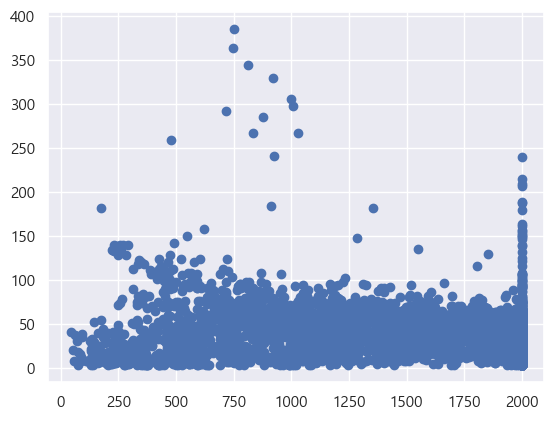

In [281]:
plt.scatter(df_22['시정(10m)'], df_22['PM10_1'])
plt.show()

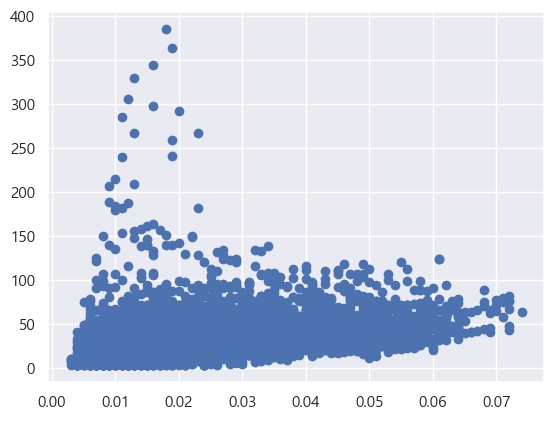

In [283]:
plt.scatter(df_22['NO2'], df_22['PM10_1'])
plt.show()

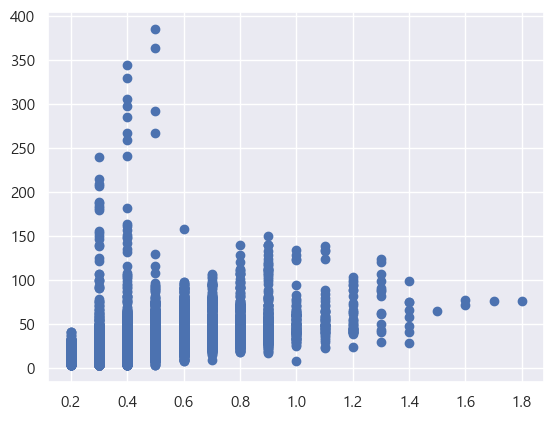

In [284]:
plt.scatter(df_22['CO'], df_22['PM10_1'])
plt.show()

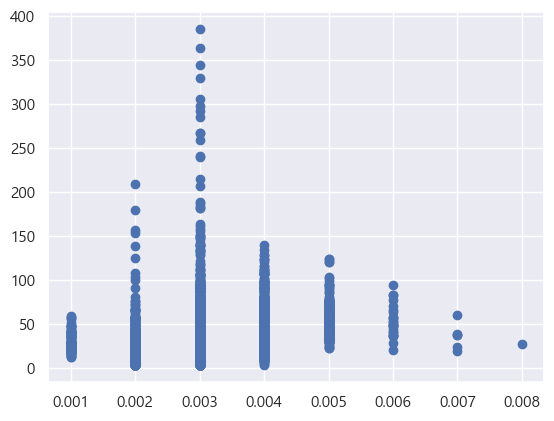

In [286]:
plt.scatter(df_22['SO2'], df_22['PM10_1'])
plt.show()

In [ ]:
plt.scatter(df_22['NO2'], df_22['PM10_1'])
plt.show()

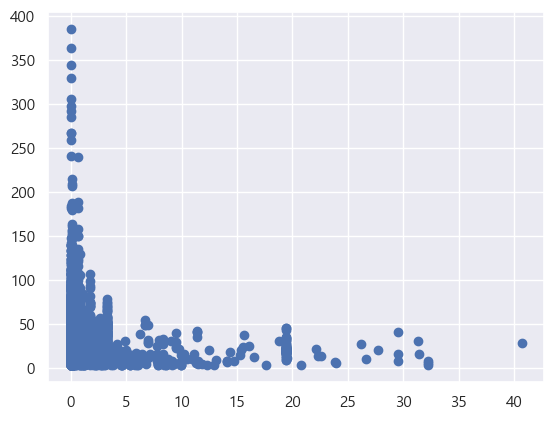

In [287]:
plt.scatter(df_22['강수량(mm)'], df_22['PM10_1'])

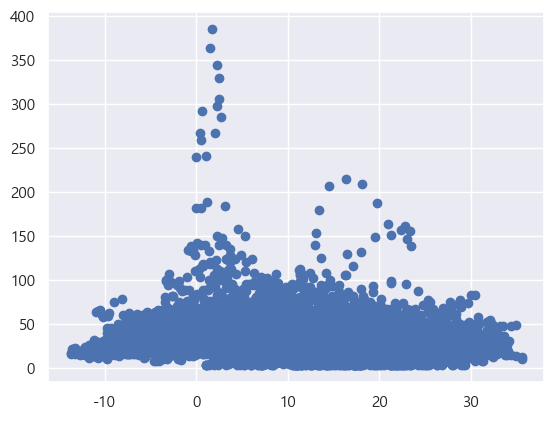

In [288]:
plt.scatter(df_22['기온(°C)'], df_22['PM10_1'])
plt.show()